In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

#### Simulations on Montgomery Neighborhood (vertex count)

In [18]:
from data_utils import *

G = load_graph()
G = find_neighborhood(G, size=1000)
degrees = [d[1] for d in G.degree]
print("Maximum Degree: ", max(degrees), "\nAverage Degree: ", sum(degrees)/len(degrees), "\nEdge Count: ", len(G.edges))

Maximum Degree:  57 
Average Degree:  13.162 
Edge Count:  6581


(array([263., 277., 223., 111.,  56.,  52.,   9.,   2.,   3.,   4.]),
 array([ 1. ,  6.6, 12.2, 17.8, 23.4, 29. , 34.6, 40.2, 45.8, 51.4, 57. ]),
 <BarContainer object of 10 artists>)

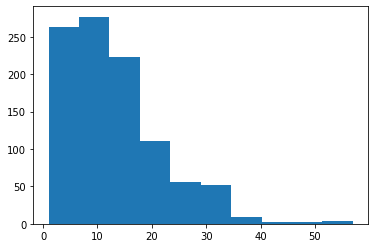

In [3]:
plt.hist(degrees)

##### Budget Experiments

In [15]:
vertex_count = 1000
#graph_seed = 42
#graph_seed = 3345638259
graph_seed = 379427824

In [16]:
file_path = f'mont_budget_run_{vertex_count}_trials_{graph_seed}.json'
df_leak_runs = pd.read_json(file_path)

In [17]:
df_leak_runs.groupby(['budget', 'lp_type'])['num_vertices'].count()

budget  lp_type   
50      avg_degree    15
        max_degree    15
100     avg_degree    15
        max_degree    15
150     avg_degree    15
        max_degree    15
200     avg_degree    15
        max_degree    15
250     avg_degree    15
        max_degree    15
300     avg_degree    15
        max_degree    15
350     avg_degree    15
        max_degree    15
400     avg_degree    15
        max_degree    15
450     avg_degree    15
        max_degree    15
500     avg_degree    15
        max_degree    15
Name: num_vertices, dtype: int64

##### Leak Probability #####

In [5]:
vertex_count = 1000
#graph_seed = 42
graph_seed = 3345638259
graph_seed = 379427824

In [6]:
file_path = f'mont_leak_run_{vertex_count}_narrow_{graph_seed}.json'
df_leak_runs = pd.read_json(file_path)

In [7]:
df_leak_runs.groupby(['leak_probability', 'lp_type'])['num_vertices'].count()

leak_probability  lp_type   
0.025             avg_degree    11
                  max_degree    11
0.050             avg_degree    11
                  max_degree    11
0.075             avg_degree    11
                  max_degree    11
0.100             avg_degree    11
                  max_degree    11
0.125             avg_degree    11
                  max_degree    11
0.150             avg_degree    11
                  max_degree    10
0.175             avg_degree    10
                  max_degree    10
0.200             avg_degree    10
                  max_degree    10
0.225             avg_degree    10
                  max_degree    10
0.250             avg_degree    10
                  max_degree    10
0.275             avg_degree    10
                  max_degree    10
0.300             avg_degree    10
                  max_degree    10
Name: num_vertices, dtype: int64

<Axes: xlabel='leak_probability', ylabel='lp_objective'>

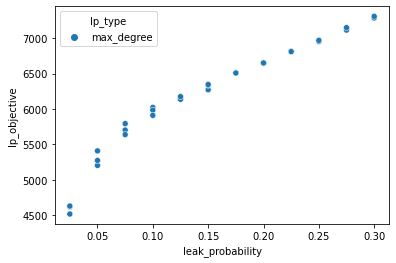

In [8]:
df_leak_runs = pd.read_json(file_path)
sns.scatterplot(df_leak_runs[df_leak_runs['lp_type']=='max_degree'], x="leak_probability", y="lp_objective", hue="lp_type")
# Objective for avg degree is given as number of edges covered
# Objective for max degree is given as the degree of uncovered edges

<Axes: xlabel='leak_probability', ylabel='lp_objective'>

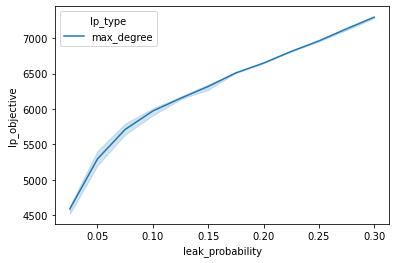

In [9]:
sns.lineplot(df_leak_runs[df_leak_runs['lp_type']=='max_degree'], x="leak_probability", y="lp_objective", hue="lp_type")
#sns.lineplot(df_leak_runs, x="leak_probability", y="evaluated_max_degree", hue="lp_type")

<Axes: xlabel='leak_probability', ylabel='lp_objective'>

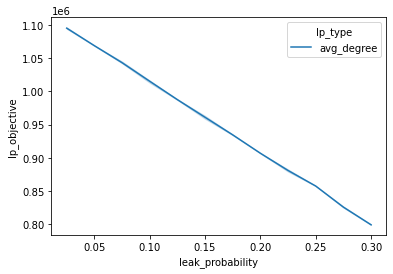

In [10]:
sns.lineplot(df_leak_runs[df_leak_runs['lp_type']=='avg_degree'], x="leak_probability", y="lp_objective", hue="lp_type")
#sns.lineplot(df_leak_runs, x="leak_probability", y="evaluated_max_degree", hue="lp_type")

Text(1, -0.1, 'Vertices are selected from the Montgomery network using BFS on a randomly selected node to create a neighborhood of 1000. Leak probability is adjusted with intervals of 0.025, ranging from 0.025 to 0.3. The network is trained and evaluated on a sample size of 250 for a total of 15 trials.')

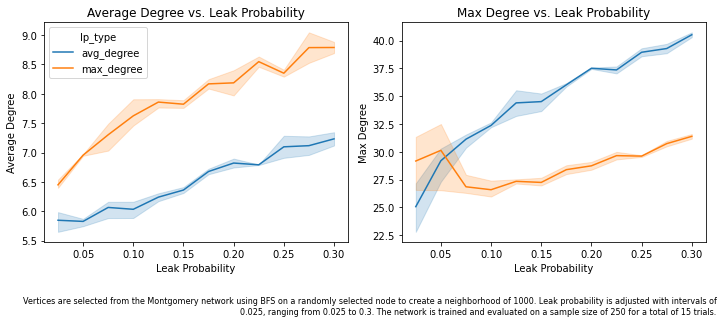

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.lineplot(df_leak_runs, x="leak_probability", y="evaluated_avg_degree", hue="lp_type", ax=axs[0])
axs[0].set_title("Average Degree vs. Leak Probability")
axs[0].set_ylabel("Average Degree")
axs[0].set_xlabel("Leak Probability")

sns.lineplot(df_leak_runs, x="leak_probability", y="evaluated_max_degree", hue="lp_type", ax=axs[1], legend=False)
axs[1].set_title("Max Degree vs. Leak Probability")
axs[1].set_ylabel("Max Degree")
axs[1].set_xlabel("Leak Probability")

plt.tight_layout()
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figtext(1, -0.1, f"Vertices are selected from the Montgomery network using BFS on a randomly selected node to create a neighborhood of {vertex_count}. \
Leak probability is adjusted with intervals of 0.025, ranging from 0.025 to 0.3. The network is trained and evaluated on a sample size of 250 for a total of 15 trials.",\
            wrap=True, horizontalalignment='right', fontsize=8)

* 15 trials
* 250 samples taken (for LP and for testing)
* 1000 node graph
* budget is 20% of the population (200 nodes)
* leak probability ranges from 0.025 to 0.3 (interval of 0.025)

Text(1, -0.1, 'Vertices are selected from the Montgomery network using BFS on a randomly selected node to create a neighborhood of 1000.Leak probability is adjusted with intervals of 0.025, ranging from 0.025 to 0.3 The network is trained and evaluated on a sample size of 250 for a total of 15 trials.')

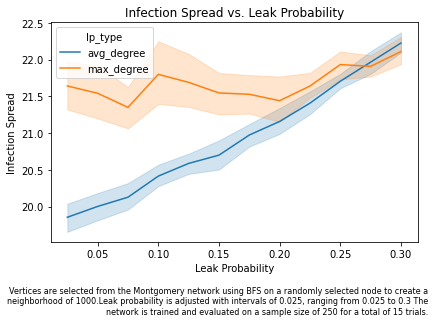

In [7]:
sns.lineplot(df_leak_runs, x="leak_probability", y="evaluated_infection_spread", hue="lp_type")
#sns.lineplot(df_leak_runs, x="leak_probability", y="original_infection_spread", label="none")
plt.title("Infection Spread vs. Leak Probability")
plt.ylabel("Infection Spread")
plt.xlabel("Leak Probability")

plt.tight_layout()
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figtext(1, -0.1, f"Vertices are selected from the Montgomery network using BFS on a randomly selected node to create a neighborhood of {vertex_count}.\
Leak probability is adjusted with intervals of 0.025, ranging from 0.025 to 0.3 The network is trained and evaluated on a sample size of 250 for a total of 15 trials.", wrap=True, horizontalalignment='right', fontsize=8)

* 15 trials
* 250 samples taken (for LP and for testing)
* 1000 node graph
* leak probability ranges from 0.025 to 0.3 (interval of 0.025)
* start with 15 infected nodes
* infection transmission rate set of 0.2 (otherwise not propagating enough through the network to compare effects)
* infection spread calculated as an average over 15 trials (of infection simulations)

In [ ]:
sns.lineplot(df_leak_runs, x="budget", y="rounded_solution_size")
plt.title("Vaccination Set Size vs. Budget")
plt.ylabel("Vaccination Set Size")
plt.xlabel("Budget")

plt.tight_layout()

##### Budget

In [8]:
vertex_count = 1000

In [9]:
df_budget_runs = pd.read_json(f"mont_budget_run_{vertex_count}_trials.json")

In [10]:
df_budget_runs.groupby(['budget', 'lp_type'])['num_vertices'].count()

budget  lp_type   
50      avg_degree    15
        max_degree    15
100     avg_degree    15
        max_degree    15
150     avg_degree    15
        max_degree    15
200     avg_degree    15
        max_degree    15
250     avg_degree    15
        max_degree    15
300     avg_degree    15
        max_degree    15
350     avg_degree    15
        max_degree    15
400     avg_degree    15
        max_degree    15
450     avg_degree    15
        max_degree    15
500     avg_degree    15
        max_degree    15
Name: num_vertices, dtype: int64

Text(1, -0.1, 'Vertices are selected from the Montgomery network using BFS on a randomly selected node to create a neighborhood of 1000. Budget is adjusted with intervals of 50, ranging from 50 to 500. The network is trained and evaluated on a sample size of 250 for a total of 15 trials.')

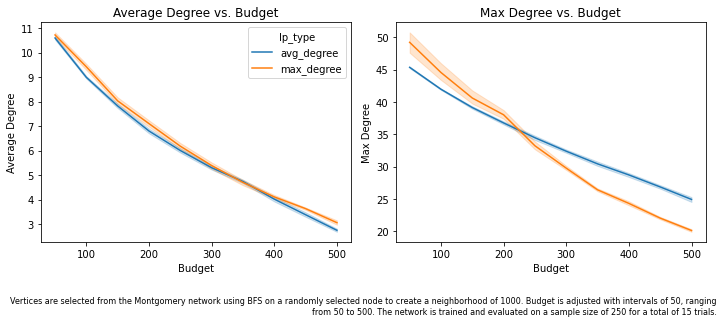

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.lineplot(df_budget_runs, x="budget", y="evaluated_avg_degree", hue="lp_type", ax=axs[0])
axs[0].set_title("Average Degree vs. Budget")
axs[0].set_ylabel("Average Degree")
axs[0].set_xlabel("Budget")

sns.lineplot(df_budget_runs, x="budget", y="evaluated_max_degree", hue="lp_type", ax=axs[1], legend=False)
axs[1].set_title("Max Degree vs. Budget")
axs[1].set_ylabel("Max Degree")
axs[1].set_xlabel("Budget")

plt.tight_layout()
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figtext(1, -0.1, f"Vertices are selected from the Montgomery network using BFS on a randomly selected node to create a neighborhood of {vertex_count}. \
Budget is adjusted with intervals of 50, ranging from 50 to 500. The network is trained and evaluated on a sample size of 250 for a total of 15 trials.",\
            wrap=True, horizontalalignment='right', fontsize=8)

* 15 trials
* 250 samples taken (for LP and for testing)
* 1000 node graph
* leak probability is 0.2
* budget ranges from 50 to 500 (interval of 50 nodes)

Text(1, -0.1, 'Vertices are selected from the Montgomery network using BFS on a randomly selected node to create a neighborhood of 1000.Budget is adjusted with intervals of 50, ranging from 50 to 500. The network is trained and evaluated on a sample size of 250 for a total of 15 trials.')

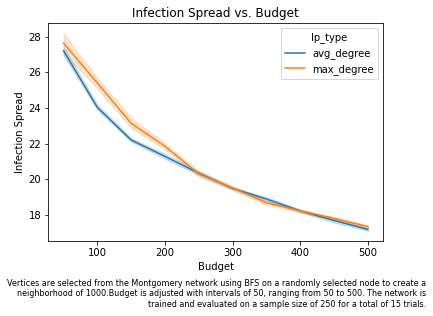

In [13]:
sns.lineplot(df_budget_runs, x="budget", y="evaluated_infection_spread", hue="lp_type")
plt.title("Infection Spread vs. Budget")
plt.ylabel("Infection Spread")
plt.xlabel("Budget")

plt.figtext(1, -0.1, f"Vertices are selected from the Montgomery network using BFS on a randomly selected node to create a neighborhood of {vertex_count}.\
Budget is adjusted with intervals of 50, ranging from 50 to 500. The network is trained and evaluated on a sample size of 250 for a total of 15 trials.", wrap=True, horizontalalignment='right', fontsize=8)

* 15 trials
* 250 samples taken (for LP and for testing)
* 1000 node graph
* budget ranged from 50 to 500 nodes (intervals of 50) <-- vaccinating 5% to 50% of the population
* start with 15 infected nodes
* infection transmission rate set of 0.2 (otherwise not propagating enough through the network to compare effects)
* infection spread calculated as an average over 15 trials (of infection simulations)

#### Simulations on Montgomery (selective)

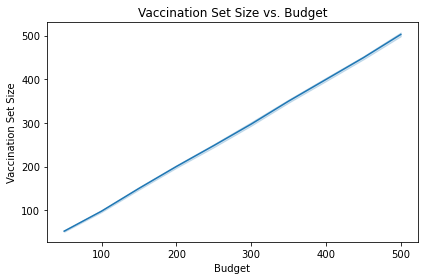

In [15]:
#fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.lineplot(df_budget_runs, x="budget", y="rounded_solution_size")
plt.title("Vaccination Set Size vs. Budget")
plt.ylabel("Vaccination Set Size")
plt.xlabel("Budget")

plt.tight_layout()

In [2]:
df_graph_size_runs = pd.read_json("avg_degree_mont_vertices_run.json")

Text(1, -0.1, 'Vertices are selected from the Montgomery network with probability ranging from 0.05 to 0.25, with intervals of 0.05, to simulate a post-vaccination network. Sample size of 1000.')

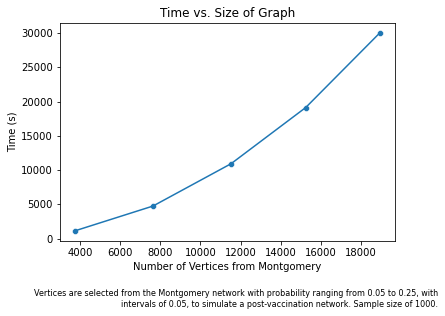

In [8]:
sns.scatterplot(df_graph_size_runs, x="num_vertices", y="total_time")
sns.lineplot(df_graph_size_runs, x="num_vertices", y="total_time")
plt.title("Time vs. Size of Graph")
plt.ylabel("Time (s)")
plt.xlabel("Number of Vertices from Montgomery")
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figtext(1, -0.1, "Vertices are selected from the Montgomery network with probability ranging from 0.05 to 0.25, with intervals of 0.05, to simulate a post-vaccination network. Sample size of 1000.", wrap=True, horizontalalignment='right', fontsize=8)

Text(1, -0.1, 'Vertices are selected from the Montgomery network with probability ranging from 0.05 to 0.25, with intervals of 0.05, to simulate a post-vaccination network. Sample size of 1000.')

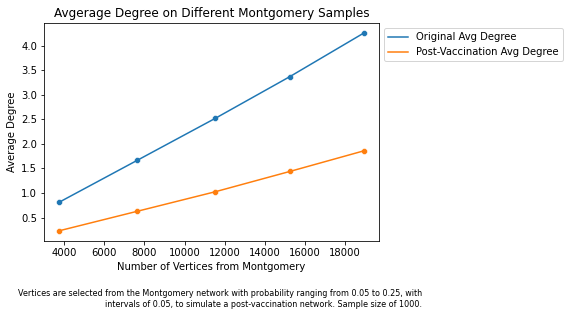

In [14]:
sns.scatterplot(df_graph_size_runs, x="num_vertices", y="original_avg_degree")
sns.lineplot(df_graph_size_runs, x="num_vertices", y="original_avg_degree", label="Original Avg Degree")
sns.scatterplot(df_graph_size_runs, x="num_vertices", y="evaluated_avg_degree")
sns.lineplot(df_graph_size_runs, x="num_vertices", y="evaluated_avg_degree", label="Post-Vaccination Avg Degree")
plt.title("Avgerage Degree on Different Montgomery Samples")
plt.ylabel("Average Degree")
plt.xlabel("Number of Vertices from Montgomery")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figtext(1, -0.1, "Vertices are selected from the Montgomery network with probability ranging from 0.05 to 0.25, with intervals of 0.05, to simulate a post-vaccination network. Sample size of 1000.", wrap=True, horizontalalignment='right', fontsize=8)

Text(1, -0.1, 'Vertices are selected from the Montgomery network with probability ranging from 0.05 to 0.25, with intervals of 0.05, to simulate a post-vaccination network. Sample size of 1000.')

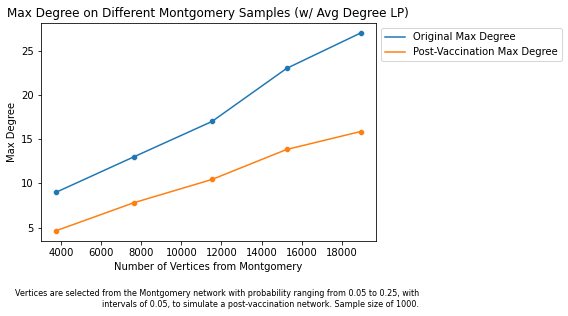

In [16]:
sns.lineplot(df_graph_size_runs, x="num_vertices", y="original_max_degree", label="Original Max Degree")
sns.scatterplot(df_graph_size_runs, x="num_vertices", y="original_max_degree")
sns.lineplot(df_graph_size_runs, x="num_vertices", y="evaluated_max_degree", label="Post-Vaccination Max Degree")
sns.scatterplot(df_graph_size_runs, x="num_vertices", y="evaluated_max_degree")
plt.title("Max Degree on Different Montgomery Samples (w/ Avg Degree LP)")
plt.ylabel("Max Degree")
plt.xlabel("Number of Vertices from Montgomery")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figtext(1, -0.1, "Vertices are selected from the Montgomery network with probability ranging from 0.05 to 0.25, with intervals of 0.05, to simulate a post-vaccination network. Sample size of 1000.", wrap=True, horizontalalignment='right', fontsize=8)

#### Simple Experiments (Erdos Renyi, Small Graphs)

In [20]:
df_samplesize_runs = pd.read_json("avg_degree_samplesize_runs.json")
df_samplesize_runs['rounded_size'] = df_samplesize_runs["rounded_solution"].apply(lambda x: len(x))
df_samplesize_runs['avg_degree'] = df_samplesize_runs["edges"].apply(lambda x: len(x)/50)
df_samplesize_runs.drop(columns=["vertices", "edges", "given_solution", "rounded_solution"], inplace=True)

Text(1, -0.1, 'The number of samples range from 100 to 1000, increasing by increments of 100. A total of 10 trials were conducted per sample size. Each of the ten trials comes from a random Erdos Renyi graphs with 50 vertices and a 0.5 edge creation probability. The average degree was evaluated on a sample of size 1000.')

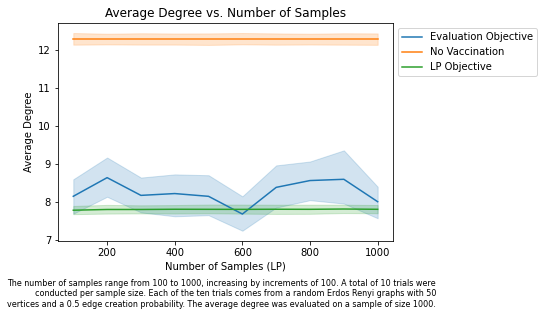

In [22]:
sns.lineplot(df_samplesize_runs, x="sample_size", y="evaluated_objective", label="Evaluation Objective")
sns.lineplot(df_samplesize_runs, x="sample_size", y="avg_degree", label="No Vaccination")
sns.lineplot(df_samplesize_runs, x="sample_size", y="lp_objective", label="LP Objective")
plt.title("Average Degree vs. Number of Samples")
plt.ylabel("Average Degree")
plt.xlabel("Number of Samples (LP)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figtext(1, -0.1, "The number of samples range from 100 to 1000, increasing by increments of 100. A total of 10 trials were conducted per sample size. Each of the ten trials comes from a random Erdos Renyi graphs with 50 vertices and a 0.5 edge creation probability. The average degree was evaluated on a sample of size 1000.", wrap=True, horizontalalignment='right', fontsize=8)

Text(1, -0.1, 'The number of samples range from 100 to 1000, increasing by increments of 100. A total of 10 trials were conducted per sample size. Each of the ten trials comes from a random Erdos Renyi graphs with 50 vertices and a 0.5 edge creation probability. The average degree was evaluated on a sample of size 1000.')

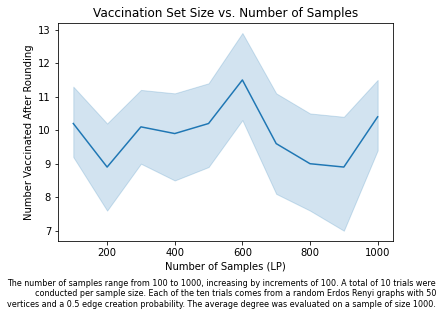

In [23]:
sns.lineplot(df_samplesize_runs, x="sample_size", y="rounded_size")
plt.title("Vaccination Set Size vs. Number of Samples")
plt.ylabel("Number Vaccinated After Rounding")
plt.xlabel("Number of Samples (LP)")

plt.figtext(1, -0.1, "The number of samples range from 100 to 1000, increasing by increments of 100. A total of 10 trials were conducted per sample size. Each of the ten trials comes from a random Erdos Renyi graphs with 50 vertices and a 0.5 edge creation probability. The average degree was evaluated on a sample of size 1000.", wrap=True, horizontalalignment='right', fontsize=8)

Text(0, 0.5, 'Number of Occurrences')

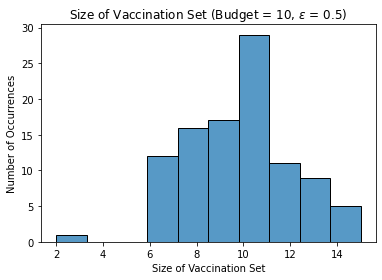

In [24]:
sns.histplot(df_samplesize_runs, x="rounded_size")
plt.title("Size of Vaccination Set (Budget = 10, $\epsilon$ = 0.5)")
plt.xlabel("Size of Vaccination Set")
plt.ylabel("Number of Occurrences")

Text(0.5, 0, 'Number of Samples (LP)')

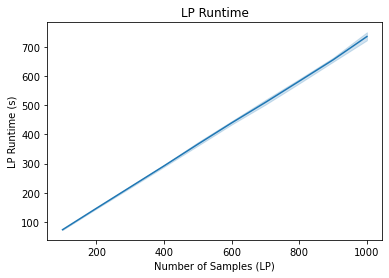

In [25]:
sns.lineplot(df_samplesize_runs, x="sample_size", y="lp_time")
plt.title("LP Runtime")
plt.ylabel("LP Runtime (s)")
plt.xlabel("Number of Samples (LP)")

In [26]:
df_samplesize_runs = pd.read_json("avg_degree_large_samplesize_runs.json")
df_samplesize_runs['rounded_size'] = df_samplesize_runs["rounded_solution"].apply(lambda x: len(x))
df_samplesize_runs['avg_degree'] = df_samplesize_runs["edges"].apply(lambda x: len(x)/50)
df_samplesize_runs.drop(columns=["vertices", "edges", "given_solution", "rounded_solution"], inplace=True)

Text(1, -0.15, 'The number of samples range from 1000 to 10000, increasing by increments of 100. A total of 10 trials were conducted per sample size. Each of the ten trials comes from a random Erdos Renyi graphs with 50 vertices and a 0.5 edge creation probability. The average degree was evaluated on a sample of size 10000.')

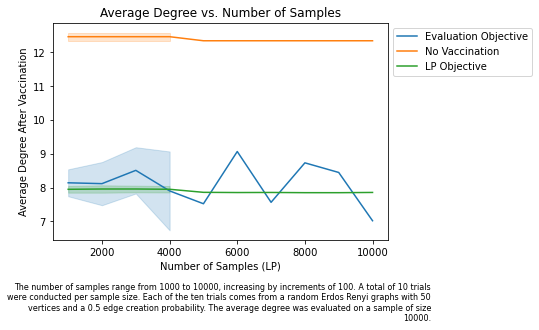

In [27]:
sns.lineplot(df_samplesize_runs, x="sample_size", y="evaluated_objective", label="Evaluation Objective")
sns.lineplot(df_samplesize_runs, x="sample_size", y="avg_degree", label="No Vaccination")
sns.lineplot(df_samplesize_runs, x="sample_size", y="lp_objective", label="LP Objective")
plt.title("Average Degree vs. Number of Samples")
plt.ylabel("Average Degree After Vaccination")
plt.xlabel("Number of Samples (LP)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.figtext(1, -0.15, "The number of samples range from 1000 to 10000, increasing by increments of 100. A total of 10 trials were conducted per sample size. Each of the ten trials comes from a random Erdos Renyi graphs with 50 vertices and a 0.5 edge creation probability. The average degree was evaluated on a sample of size 10000.", wrap=True, horizontalalignment='right', fontsize=8)

Text(0, 0.5, 'Number of Occurrences')

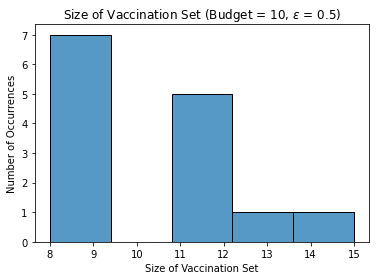

In [28]:
sns.histplot(df_samplesize_runs, x="rounded_size")
plt.title("Size of Vaccination Set (Budget = 10, $\epsilon$ = 0.5)")
plt.xlabel("Size of Vaccination Set")
plt.ylabel("Number of Occurrences")

Text(0.5, 0, 'Number of Samples (LP)')

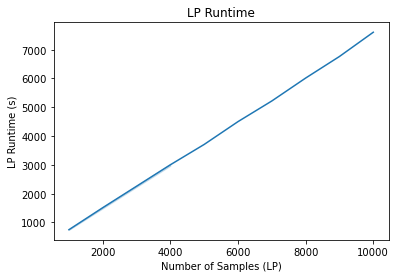

In [29]:
sns.lineplot(df_samplesize_runs, x="sample_size", y="lp_time")
plt.title("LP Runtime")
plt.ylabel("LP Runtime (s)")
plt.xlabel("Number of Samples (LP)")